<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Coursework 7</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Nicola Perra </h3>
        </td>
    </tr>
</table>

We start by loading necessary libraries, including NumPy (used for linear algebra calculations) and MatPlotLib (used for visualisation).

In [1]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
%matplotlib inline

/home/sami/miniforge3/envs/ML/lib/python3.11/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


### Regression analysis for height-weight data via gradient descent method
In this exercise you will work with a data set you are familiar with: $\mathtt{heigh\_weight.csv}$. By completing this exercise you will learn how to solve linear/polynomial regression problems using the gradient descent method. In the second part we will learn ho to solve the LASSO problem using either smoothing technique or proximal maps.

We start by loading data. **Important:** please check that the file $\mathtt{height\_weight.csv}$ is located in the same folder with your Jupyter notebook.


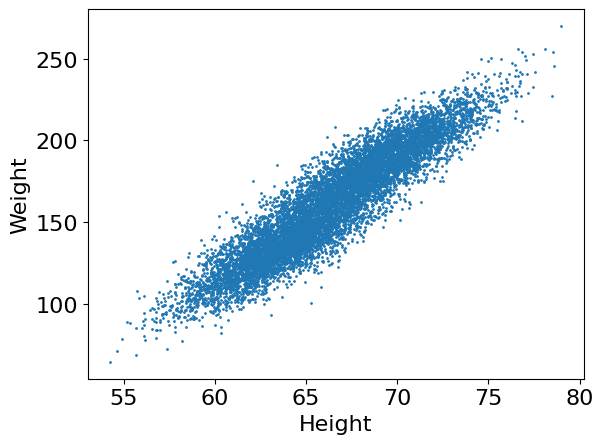

In [2]:
heights = np.genfromtxt("height_weight.csv",
                        delimiter=",",
                        skip_header=1,
                        usecols=[0])

weights = np.genfromtxt("height_weight.csv",
                        delimiter=",",
                        skip_header=1,
                        usecols=[1])
indices = np.argsort(heights)
heights = heights[indices].reshape((len(heights), 1))
weights = weights[indices].reshape((len(weights), 1))

plt.scatter(heights, weights, s=1)
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

#### Data standardisation 
In real-world problems we usually get a raw data in the form of $s$ samples each of which is described by numeric several values corresponding to different characteristics of the object. Such a data could be highly non-uniform. The goal of applying $\textit{standardisation}$ is to make sure different features of objects are on almost on the same scale so that each feature is equally important and make it easier to process by most ML algorithms. The result of standardisation is that the features will be rescaled to ensure the mean and the standard deviation to be $0$ and $1$, respectively. This means that for a data given by $\mathbf{X} = \left(
\left(\mathbf{x}^{(1)}\right)^{\top},\left(\mathbf{x}^{(2)}\right)^{\top},\ldots,\left(\mathbf{x}^{(s)}\right)^{\top}
\right) \in \mathbb{R}^{s\times d}$ we define a new, rescaled data as:
$$
\hat{\mathbf{x}}^{(i)}_k = \frac{\mathbf{x}^{(i)}_k - \left\langle \mathbf{x}_k \right\rangle }{\left(\sigma_{\mathbf{x}}\right)_k},
$$
where $\left\langle \mathbf{x}_k \right\rangle = \frac{1}{s}\sum\limits_{j=1}^s \mathbf{x}^{(j)}_k$, and
$\left(\sigma_\mathbf{x}\right)_k = \sqrt{
	\frac{1}{s}\sum\limits_{j=1}^s \left(\mathbf{x}^{(j)}_k-\left\langle \mathbf{x}_k \right\rangle\right)^2}$
are the mean and standard deviation of data vector $\mathbf{x}$. 

Write two functions 
1. **standardise** to standardise the columns of a multi-dimensional array. The function **standardise**	takes the multi-dimensional array *data_matrix* as its input argument. It subtracts the means from each column and divides by the standard deviations. It returns the *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations*.
2. **de_standardise** to de-standardise the columns of a multi-dimensional array. The function **de_standardise** reverses the above operation. It takes a *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations* as its arguments and returns a matrix for which the standardisation process is reversed.



In [3]:
def standardise(data_matrix):
    """
    for j in range(data_matrix.shape[1]):
        col = data_matrix[:, j]
        standardised_col = (col - np.mean(col)) / np.std(col)
        data_matrix[:, j] = standardised_col

    functionally works, but has a few issues:
    1. changes data in place. We may need the original data later, so this isn't good.
    2. Loop isn't making use of NumPy features of being able to do everything in one go. Like np.mean() can produce a vector of the means of all cols in one step.
    3. 2. => slower performance
    """

    # Better
    means = np.mean(data_matrix, axis=0)
    stds = np.std(data_matrix, axis=0)
    return (data_matrix - means) / stds, means, stds

    

Test your function with the following unit tests

In [4]:
test_data_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
test_standardise_data_matrix = np.array([[-1.224745, -1.224745, -1.224745],
                                         [0., 0., 0.],
                                         [1.224745, 1.224745, 1.224745]])
test_row_of_means = np.array([4, 5, 6])
test_row_of_stds = np.array(np.sqrt([6, 6, 6]))

test_result_standardise_data_matrix, test_result_row_of_means, test_result_row_of_stds = standardise(
    test_data_matrix)
assert_array_almost_equal(test_result_standardise_data_matrix,
                          test_standardise_data_matrix)
assert_array_almost_equal(test_result_row_of_means, test_row_of_means)
assert_array_almost_equal(test_result_row_of_stds, test_row_of_stds)

In [5]:
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    return (standardised_matrix * row_of_stds) + row_of_means

Test your function with the following unit tests

In [6]:
test_standardise_data_matrix = np.array([[-1.224745, -1.224745, -1.224745],
                                         [0., 0., 0.],
                                         [1.224745, 1.224745, 1.224745]])
test_row_of_means = np.array([4, 5, 6])
test_row_of_stds = np.array(np.sqrt([6, 6, 6]))

assert_array_almost_equal(
    np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    de_standardise(test_standardise_data_matrix, test_row_of_means,
                   test_row_of_stds))

In [7]:
data_input, input_row_of_means, input_row_of_stds = standardise(heights)
data_output, output_row_of_means, output_row_of_stds = standardise(weights)

#### Building linear/polynomial regressions
In this part you are given a piece of the code from previous assignments that evaluates coefficients of polynomial regression of fixed degree.

In [8]:
def polynomial_basis(data_inputs, degree):
    """
    data_inputs is (s, 1). 
    We start with a col of 1's with length of data_inputs. 
    In every iteration, we raise each element of data_inputs to the power of i + 1, and stack on the right of X.
    """
    X_matrix = np.ones((len(data_inputs), 1))
    for i in range(degree):
        X_matrix = np.c_[X_matrix, np.power(data_inputs, i + 1)]
    return X_matrix


def polynomial_regression(data_matrix, data_outputs):
    return np.linalg.solve(data_matrix.T @ data_matrix,
                           data_matrix.T @ data_outputs)


def prediction_function(data_matrix, weights):
    """
    data_matrix: (n, d)
    weights: (d, 1)

    output: (n, 1)
    """
    return data_matrix @ weights

Now use the above functions to evaluate optimal weights in two cases: $d=1$ (linear regression) and $d=5$ (polynomial regression). Plot corresponding results.

In [26]:
degree_linear = 1
degree_polynomial = 5
data_matrix_linear = polynomial_basis(data_input, degree_linear)
data_matrix_polynomial = polynomial_basis(data_input, degree_polynomial)
optimal_weights_linear = polynomial_regression(data_matrix_linear, data_output)
optimal_weights_polynomial = polynomial_regression(data_matrix_polynomial,
                                                   data_output)

print("Optimal linear regression coefficients are equal to: {w}. \
    \nOptimal polynomial regression (d = {d}) coefficients are equal to: {p}"                                                                             .\
      format(w = optimal_weights_linear.T, d = degree_polynomial, p = optimal_weights_polynomial.T))

Optimal linear regression coefficients are equal to: [[-7.65399555e-16  9.24756299e-01]].     
Optimal polynomial regression (d = 5) coefficients are equal to: [[-1.54785292e-03  1.05220213e+00  4.03175451e-03 -7.60510612e-02
  -4.05488665e-04  6.63445949e-03]]


**Remark:** please note that an optimal polynomial of degree $5$ is almost equal to a linear function. We will see later that this is not the case for corresponding LASSO problem.

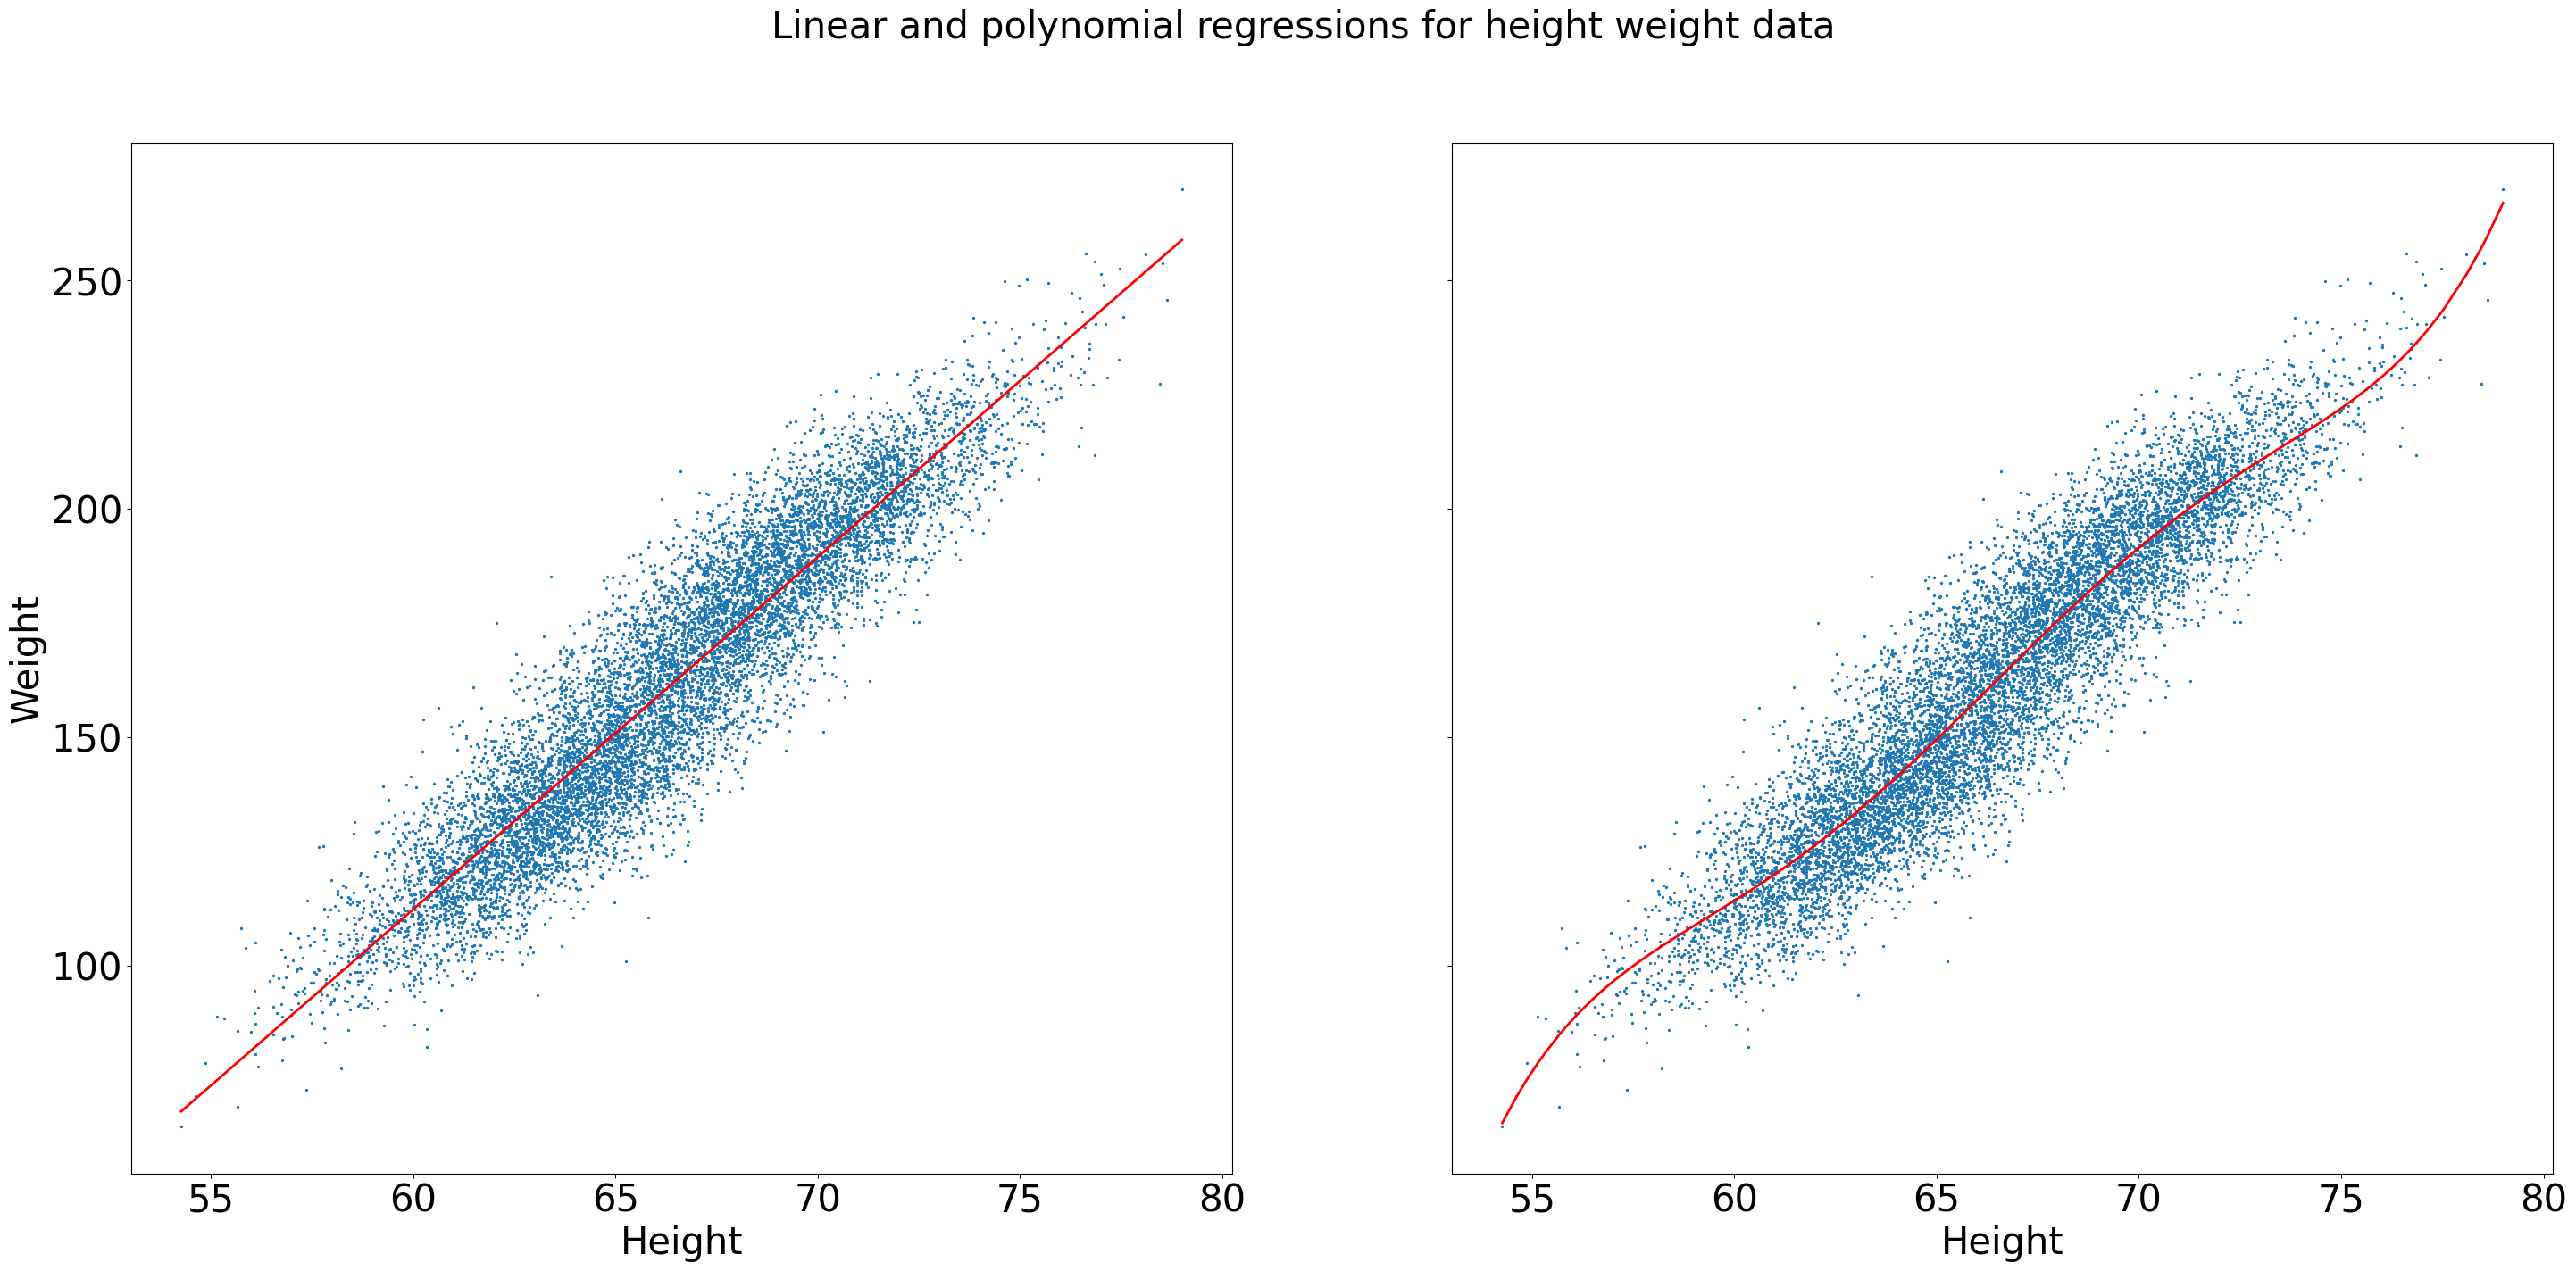

In [10]:
# pred_function result is shape (n, 1)
predictions_linear = de_standardise(prediction_function(data_matrix_linear, optimal_weights_linear),\
                                    output_row_of_means, output_row_of_stds)


predictions_polynomial = de_standardise(prediction_function(data_matrix_polynomial, optimal_weights_polynomial),\
                                       output_row_of_means, output_row_of_stds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 15))
fig.suptitle('Linear and polynomial regressions for height weight data',
             fontsize=30)
for ax in fig.get_axes():
    ax.scatter(heights, weights, s=2)
    ax.set(xlabel='Height', ylabel='Weight')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.label_outer()
ax1.plot(heights, predictions_linear, linewidth=2, color='r')
ax2.plot(heights, predictions_polynomial, linewidth=2, color='r')
plt.tight_layout;

#### Solving regression problem with the gradient descent
The gradient descent is a method of finding a minimum of a function by running an iterative algorithm. Let $E\left(\mathbf{w}\right): \mathbb{R}^n \to \mathbb{R}$ be a real valued, convex, differentiable function of $n$-dimensional argument $\mathbf{w}=\left(w_1,w_2,\ldots,w_n\right)$. Let $\mathbf{w}^{(0)}$ be an arbitrary $n$-dimensional vector. Then the minimiser of the function $E$ can be approximated by consecutively evaluating
$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \tau \nabla E\left(\mathbf{w}^{(k)}\right), \quad k\geq 0,
$$
where $\tau > 0$ is a step-size parameter.

1. Implement a function $\mathtt{gradient\_descent}$ that performs gradient descent to numerically approximate a minimiser of a convex function. The function should take the following arguments
- *objective* - a lambda-function representing function $E$. This itself should take a NumPy array as its argument and return a real number.
- *gradient* - a lambda-function representing function $\nabla E$. This itself should take a NumPy array as its argument and return a NumPy array representation of the gradient $\nabla E$.
- *initial_ weights* - a NumPy array with initial values $\mathbf{w}^{(0)}$ for the first iterate 
- *step_size* - a step-size parameter $\tau$ for the gradient descent step
- *no_of_iterations* - an integer parameter that controls the number of iterations
- *print_output* - an integer parameter that controls how often you are printing an intermediate result. If say *print_output = 100*, then after every 100th iteration you are asked to print your current iterate and a value of the objective as *Iteration k/m, objective = o.*, where $k$ is a number of current iteration, $m$ is a total number of iterations, and $o$ is a value of the objective evaluated at current iterate.

Implement the function so that it returns a NumPy array of the weights obtained after gradient descent together with a list of objective values for all iterates.

In [ ]:
def gradient_descent(objective, gradient, initial_weights, step_size=1, \
                     no_of_iterations=100, print_output=10):
    """
    - can optionally add a convergence condition allowing for possible early stop.
        - this checks difference in weights between iterations
    """
    
    weights = initial_weights
    objectives = []
    for i in range(no_of_iterations):
        error = objective(weights)
        objectives.append(error)

        grad = gradient(weights)
        weights -= step_size * grad
        
        if (i + 1) % print_output == 0:
            print(f"Iteration {i + 1}/{no_of_iterations}, Objective = {error}, Weights = {weights}")

    return weights, objectives


In [1]:
a = 2
b = a
b += 1
print(a)

2


Test your function with the following unit tests

In [12]:
test_objective = lambda x: pow(x, 2) - 2 * x + 1
test_gradient = lambda x: 2 * x - 2
test_initial_weights = np.array([0.0])
test_step_size = 0.4
test_no_of_iterations = 10
test_print_output = 1
assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size,\
                                           test_no_of_iterations, test_print_output)[0],np.array([1]))

Iteration 1/10, Objective = [1.], Weights = [0.8]
Iteration 2/10, Objective = [0.04], Weights = [0.96]
Iteration 3/10, Objective = [0.0016], Weights = [0.992]
Iteration 4/10, Objective = [6.4e-05], Weights = [0.9984]
Iteration 5/10, Objective = [2.56e-06], Weights = [0.99968]
Iteration 6/10, Objective = [1.024e-07], Weights = [0.999936]
Iteration 7/10, Objective = [4.09599998e-09], Weights = [0.9999872]
Iteration 8/10, Objective = [1.63840053e-10], Weights = [0.99999744]
Iteration 9/10, Objective = [6.55364651e-12], Weights = [0.99999949]
Iteration 10/10, Objective = [2.62123656e-13], Weights = [0.9999999]


In [13]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10

assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size,\
                                           test_no_of_iterations, test_print_output)[0],np.array([-0.564103, -0.538462]))

Iteration 10/100, Objective = -3.0256011293288547, Weights = [-0.56157964 -0.54027995]
Iteration 20/100, Objective = -3.0256410067129824, Weights = [-0.56404761 -0.53850115]
Iteration 30/100, Objective = -3.025641025632046, Weights = [-0.56410137 -0.5384624 ]
Iteration 40/100, Objective = -3.0256410256410216, Weights = [-0.56410254 -0.53846156]
Iteration 50/100, Objective = -3.0256410256410255, Weights = [-0.56410256 -0.53846154]
Iteration 60/100, Objective = -3.0256410256410255, Weights = [-0.56410256 -0.53846154]
Iteration 70/100, Objective = -3.0256410256410255, Weights = [-0.56410256 -0.53846154]
Iteration 80/100, Objective = -3.0256410256410255, Weights = [-0.56410256 -0.53846154]
Iteration 90/100, Objective = -3.025641025641026, Weights = [-0.56410256 -0.53846154]
Iteration 100/100, Objective = -3.0256410256410255, Weights = [-0.56410256 -0.53846154]


2. Write two functions $\mathtt{mean\_squared\_error}$ and $\mathtt{mean\_squared\_error\_gradient}$ that implement the mean squared error and its gradient as defined below. Both functions take a two-dimensional NumPy array *data_matrix*, a two-dimensional NumPy array *weights* and a two-dimensional NumPy array *data_outputs* as arguments. The first function should return a real number, while the second one should return a matrix representation of the MSE gradient. The MSE function and its gradient are given by
$$
MSE\left(\mathbf{w}\right) = 
\frac{1}{2s}\left\|\mathbf{\Phi}\left(\mathbf{X}\right)\mathbf{w} - \mathbf{Y}\right\|^2,
\quad
\nabla MSE\left(\mathbf{w}\right) = 
\frac{1}{s}\mathbf{\Phi}^{\top}\left(\mathbf{X}\right)\left(\mathbf{\Phi}\left(\mathbf{X}\right)\mathbf{w} - \mathbf{Y}\right),
$$
where $\mathbf{\Phi}\left(\mathbf{X}\right)$ is a mathematical representation of *data_matrix* and $\mathbf{Y}$ is a mathematical representation of *data_output*



In [14]:
def mean_squared_error(data_matrix, data_outputs, weights):
    s = len(data_matrix)
    errors = (data_matrix @ weights) - data_outputs
    return 1/(2*s) * np.linalg.norm(errors) ** 2

In [15]:
def mean_squared_error_gradient(data_matrix, data_outputs, weights):
    s = len(data_matrix)
    return 1/s * data_matrix.T@(data_matrix@weights - data_outputs)

Test your functions with the following unit tests.

In [16]:
test_data_matrix = np.array([[1, 0.98], [1, 1.02]])
test_data_outputs = np.array([[-0.1], [0.3]])
test_weights = np.array([[-9.9], [10]])
assert_array_almost_equal(
    mean_squared_error(test_data_matrix, test_data_outputs, test_weights), 0)

In [17]:
test_data_matrix = np.array([[1, 1, -1], [1, 2, 2]])
test_data_outputs = np.array([[-1, 2], [1, 3]])
test_weights = np.array([[0, 0], [1, 2], [3, 4]])
assert_array_almost_equal(
    mean_squared_error(test_data_matrix, test_data_outputs, test_weights),
    36.75)

3. Use the function $\mathtt{gradient\_descent}$ from previous question to minimise the mean squared error for linear and polynomial regression problems discussed in the first section (and thus, to compute their solutions). Take the step-size parameter equal to
$$
\tau = 0.9\cdot s\cdot\left\|\mathbf{\Phi}\left(\mathbf{X}\right)\right\|^{-2},
$$
and the number of iterations equal to $100$ for linear regressions, and $50000$ for polynomial one. Start your iterations from a zero vector of corresponding length. Compare your results with the ones you obtained in the first section.

In [27]:
"""
- Good rule of thumb to set weights to be 2D (d+1, 1)

"""


s = len(data_input)

linear_data_matrix = polynomial_basis(data_input, 1)
tau_linear = 0.9 * s * (1 / (np.linalg.norm(linear_data_matrix) ** 2))
initial_weights_linear = np.zeros((linear_data_matrix.shape[1], 1))
MSE_linear = lambda weights: mean_squared_error(linear_data_matrix, data_output, weights)
MSE_linear_grad = lambda weights: mean_squared_error_gradient(linear_data_matrix, data_output, weights)

poly_data_matrix = polynomial_basis(data_input, 5)
tau_poly = 0.9 * s * (1 / (np.linalg.norm(poly_data_matrix) ** 2))
initial_weights_poly = np.zeros((poly_data_matrix.shape[1], 1))
MSE_poly = lambda weights: mean_squared_error(poly_data_matrix, data_output, weights)
MSE_poly_grad = lambda weights: mean_squared_error_gradient(poly_data_matrix, data_output, weights)


linear_weights_gd, linear_objs = gradient_descent(MSE_linear, MSE_linear_grad, initial_weights_linear, tau_linear, 100)
poly_weights_gd, poly_objs = gradient_descent(MSE_poly, MSE_poly_grad, initial_weights_poly, tau_poly, 50000)

print(f"Linear \n ------------------ \n Weights: {linear_weights} \n \n Polynomial \n ------------------ \n Weights: {poly_weights}")


Iteration 10/100, Objective = 0.07242196283893018, Weights = [[-1.53164834e-15]
 [ 9.22413936e-01]]
Iteration 20/100, Objective = 0.072412894030561, Weights = [[-1.58441718e-15]
 [ 9.24750366e-01]]
Iteration 30/100, Objective = 0.07241289397237696, Weights = [[-1.57415565e-15]
 [ 9.24756284e-01]]
Iteration 40/100, Objective = 0.07241289397237657, Weights = [[-1.58809466e-15]
 [ 9.24756299e-01]]
Iteration 50/100, Objective = 0.07241289397237657, Weights = [[-1.56222462e-15]
 [ 9.24756299e-01]]
Iteration 60/100, Objective = 0.07241289397237657, Weights = [[-1.58128668e-15]
 [ 9.24756299e-01]]
Iteration 70/100, Objective = 0.07241289397237657, Weights = [[-1.53911174e-15]
 [ 9.24756299e-01]]
Iteration 80/100, Objective = 0.07241289397237657, Weights = [[-1.52997598e-15]
 [ 9.24756299e-01]]
Iteration 90/100, Objective = 0.07241289397237657, Weights = [[-1.53176898e-15]
 [ 9.24756299e-01]]
Iteration 100/100, Objective = 0.07241289397237657, Weights = [[-1.52731698e-15]
 [ 9.24756299e-01]]
I

Test your results with the following unit tests

In [28]:
assert_array_almost_equal(linear_weights_gd, optimal_weights_linear)

In [29]:
assert_array_almost_equal(poly_weights_gd,
                          optimal_weights_polynomial)

As one can see from above tests, the weights obtained with gradient descent coincide with the ones obtained by solving the normal equation.

### The LASSO problem for height-weight data


1. Write a function $\mathtt{lasso\_cost\_function}$ that implements the LASSO cost function as introduced in the lecture notes. The arguments include *data_matrix*, *weights* and *outputs* similar to $\mathtt{mean\_squared\_error}$, but further a positive scalar *regularisation_parameter* that controls the balance between mean squared error and the one norm.

In [30]:
def lasso_cost_function(data_matrix, outputs, weights,
                        regularisation_parameter):
    s = len(data_matrix)
    errors = (data_matrix @ weights) - outputs
    return (1/(2*s) * np.linalg.norm(errors) ** 2) + regularisation_parameter * np.sum(np.abs(weights))

Apply your function to the data below

In [31]:
test_samples, test_dimensions, test_output_dimensions,test_regularisation_parameter = np.random.randint(low=2, high=100, size=4)
test_inputs = np.random.rand(test_samples, test_dimensions)
test_data_outputs = np.random.rand(test_samples, test_output_dimensions)
test_data_matrix = np.c_[np.ones((len(test_inputs), 1)), test_inputs]
test_weights = np.random.rand(test_dimensions + 1, test_output_dimensions)

We now implement two methods of solving the LASSO problem. Namely,
- Smoothing of one-norm
- Proximal gradient descent

#### Smoothing of one-norm


1. Write a function $\mathtt{huber\_loss}$ that evaluates a value of the Huber loss function for a vector. Your function should take a NumPy array *argument* and a scalar *smoothing_parameter* as its arguments. This function is defined as
$$
H_{\tau}(\mathbf{w}) =
\sum_{j=0}^{d} |w_j|_{\tau},\quad
\text{with}\quad
|x|_{\tau} =
\begin{cases}
|x| - \dfrac{\tau}{2}, & |x|\ge \tau,\\[4pt]
\dfrac{x^2}{2\tau}, & |x|< \tau,
\end{cases}
$$

where $\tau$ is a mathematical representation of *smoothing_parameter*, while $\mathbf{w}$ is mathematical representation of *argument*.


In [ ]:
def huber_loss(argument, smoothing_parameter):
    # YOUR CODE HERE
    raise NotImplementedError()

Test your function with the following unit tests

In [ ]:
assert_array_almost_equal(huber_loss(np.array([1, 2, 3, -4]), 2), 6.25)

2. Implement the gradient of Huber loss function $\mathtt{huber\_loss\_gradient}$. Your function should take a NumPy array *argument* and a scalar *smoothing_parameter* as its arguments and perform the evaluation of the derivative of Huber loss function
$$
\left|x\right|'_{\tau}
=
\begin{cases}
\mathrm{sgn}\left(x\right), &\left|x\right|\geq \tau,\\
\frac{x}{\tau}, &\left|x\right|< \tau,
\end{cases}
$$
to each component of the array.

In [ ]:
def huber_loss_gradient(argument, smoothing_parameter):
    # YOUR CODE HERE
    raise NotImplementedError()

Test your function with the following unit test

In [ ]:
assert_array_almost_equal(huber_loss_gradient(np.array([1, 2, 3, -4]), 2),
                          np.array([0.5, 1., 1., -1.]))

3. Use the function $\mathtt{gradient\_descent}$ from previous question to minimise the lasso cost function for linear and polynomial regression problems discussed in the first section (and thus, to compute their solutions). Take the gradient step-size parameter equal to
$$
\tau = 0.45\cdot s\cdot\left\|\mathbf{\Phi}\left(\mathbf{X}\right)\right\|^{-2},
$$
while assign the Huber loss smoothing parameter with $\hat\tau = 2\cdot \alpha\cdot\tau$, where the regularisation parameter $\alpha$ is equal to $\frac{1}{2}$. Take the number of iterations equal to $1000$ for linear regressions, and $50000$ for polynomial one. Start your iterations from a zero vector of corresponding length. Compare your results with the ones you obtained in the first section.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
hl_optimal_weights_linear = gradient_descent(test_objective_linear,
                                             test_gradient_linear,
                                             test_initial_weights_linear,
                                             test_step_size_linear, 1000,
                                             100)[0]

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
hl_optimal_weights_polynomial = gradient_descent(
    test_objective_polynomial, test_gradient_polynomial,
    test_initial_weights_polynomial, test_step_size_polynomial, 50000, 5000)[0]

In [ ]:
print("Optimal linear regression coefficients are equal to: {l}. \
    \nOptimal polynomial regression (d = {d}) coefficients are equal to: {p}"                                                                             .\
      format(l = hl_optimal_weights_linear.T, d = degree_polynomial,p = hl_optimal_weights_polynomial.T))

Test your results with the following unit tests

In [ ]:
assert_array_almost_equal(hl_optimal_weights_linear,
                          np.array([[1.372813e-16], [4.247563e-01]]))

In [ ]:
assert_array_almost_equal(
    hl_optimal_weights_polynomial,
    np.array([[-6.045255e-05], [4.988579e-03], [-1.228225e-05],
              [1.92627433e-01], [-3.09616971e-04], [1.77316147e-03]]))

You can now observe that a polynomial function is very different from a linear one. It is rather qubic now. We finish by plotting resulting regression functions.

In [ ]:
hl_predictions_linear = de_standardise(prediction_function(data_matrix_linear, hl_optimal_weights_linear),\
                                    output_row_of_means, output_row_of_stds)
hl_predictions_polynomial = de_standardise(prediction_function(data_matrix_polynomial, hl_optimal_weights_polynomial),\
                                       output_row_of_means, output_row_of_stds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 15))
fig.suptitle('Linear and polynomial regressions for height weight data',
             fontsize=30)
for ax in fig.get_axes():
    ax.scatter(heights, weights, s=2)
    ax.set(xlabel='Height', ylabel='Weight')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.label_outer()
ax1.plot(heights, hl_predictions_linear, linewidth=2, color='r')
ax2.plot(heights, hl_predictions_polynomial, linewidth=2, color='r')
plt.tight_layout;

#### Proximal gradient descent
In this part we extend the concept of gradient descent to proximal gradient descent. Subsequently, we use proximal gradient descent to implement the LASSO problem introduced in the lecture.

1. Based on your function $\mathtt{gradient\_descent}$ from above, write a function $\mathtt{proximal\_gradient \_descent}$ that takes all the arguments of $\mathtt{gradient\_descent}$ but also a function *proximal_map*.

In [ ]:
def proximal_gradient_descent(objective, gradient, proximal_map, initial_weights, \
                              step_size=1, no_of_iterations=100, print_output=10):
    # YOUR CODE HERE
    raise NotImplementedError()

Apply your function below

In [ ]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (
test_matrix_m @ x) + x @ test_vector_v + 2 * np.linalg.norm(x, ord=1)
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 1000
test_print_output = 100
test_proximal_map = lambda x: np.sign(x) * np.maximum(
0,
np.abs(x) - test_step_size)

2. Implement the proximal map for the one-norm, also known as soft thresholding. Write a function $\mathtt{proximal\_map}$ that takes a NumPy array *argument* and a scalar *threshold* as its arguments and performs the soft-thresholding operation to each component of the array. This is defined as
$$
\mathrm{soft}_{\tau}\left(x\right) = 
x - \tau\cdot H'_{\tau}\left(x\right) = 
\begin{cases}
x - \mathrm{sgn}\left(x\right)\cdot\tau, &\left|x\right|\geq \tau,\\
0, &\left|x\right| < \tau.
\end{cases}
$$

In [ ]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    raise NotImplementedError()

3. Use the function $\mathtt{proximal\_gradient\_descent}$ from previous question to minimise the lasso cost function for linear and polynomial regression problems discussed in the above. Take the gradient step-size parameter equal to
$$
\tau = 0.9\cdot s\cdot\left\|\mathbf{\Phi}\left(\mathbf{X}\right)\right\|^{-2},
$$
while assign the proximal map smoothing parameter with $\hat\tau = \alpha\cdot\tau$, where the regularisation parameter $\alpha$ is equal to $\frac{1}{2}$. Take the number of iterations equal to $1000$ for linear regressions, and $50000$ for polynomial one. Start your iterations from a zero vector of corresponding length. Compare your results with the ones you obtained in the first section.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
pm_optimal_weights_linear = proximal_gradient_descent(
    test_objective_linear, test_gradient_linear, test_proximal_map_linear,
    test_initial_weights_linear, test_step_size_linear, 1000, 100)[0]

Test your result with the following unit test

In [ ]:
assert_array_almost_equal(pm_optimal_weights_linear,
                          np.array([[-0.], [0.424756]]))

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
pm_optimal_weights_polynomial = proximal_gradient_descent(
    test_objective_polynomial, test_gradient_polynomial,
    test_proximal_map_polynomial, test_initial_weights_polynomial,
    test_step_size_polynomial, 50000, 5000)[0]

Test your result with the following unit test

In [ ]:
assert_array_almost_equal(pm_optimal_weights_polynomial,
                          np.array([[0], [0], [0], [0.17920935], [0], [0]]))

We would like to emphasize now that the optimal polynomial has a form $p\left(x\right) = 0.17920395\cdot x^3$. This is in complete agreement with the LASOO method: all coefficients except one are zero. We finish by plotting optimal linear and optimal polynomial regression functions. 

In [ ]:
pm_predictions_linear = de_standardise(prediction_function(data_matrix_linear, pm_optimal_weights_linear),\
                                    output_row_of_means, output_row_of_stds)
pm_predictions_polynomial = de_standardise(prediction_function(data_matrix_polynomial, pm_optimal_weights_polynomial),\
                                       output_row_of_means, output_row_of_stds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 15))
fig.suptitle('Linear and polynomial regressions for height weight data',
             fontsize=30)
for ax in fig.get_axes():
    ax.scatter(heights, weights, s=2)
    ax.set(xlabel='Height', ylabel='Weight')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.label_outer()
ax1.plot(heights, pm_predictions_linear, linewidth=2, color='r')
ax2.plot(heights, pm_predictions_polynomial, linewidth=2, color='r')
plt.tight_layout;